In [469]:
# import pandas as pd
import csv
import numpy as np
import os
import copy
from os.path import join as pjoin
from glob import iglob

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [470]:
#!/usr/bin/env python
from __future__ import division

import argparse
import glob
import os
import random
import signal
import time

import torch

import distributed
from models import data_loader, model_builder
from models.data_loader import load_dataset
from models.model_builder import ExtSummarizer
from models.trainer_ext import build_trainer
from others.logging import logger, init_logger

model_flags = ['hidden_size', 'ff_size', 'heads', 'inter_layers', 'encoder', 'ff_actv', 'use_interval', 'rnn_size']


In [471]:
root_path = '/data/ksb/'
bert_root_path = pjoin(root_path, 'BertSum/PreSumm')
bert_model_dir = pjoin(bert_root_path, 'models')

data_dir = pjoin(root_path, 'cnn-dailymail/finished_files')

#### Loss function 비교  

*Trained Model parameter 필요*


In [1]:
import gensim
print(gensim.__version__)
#> '3.6.0'

from gensim.matutils import softcossim 
from gensim import corpora
import gensim.downloader as api
from gensim.utils import simple_preprocess
#> '3.6.0'

# Download the FastText model
fasttext_model300 = api.load('fasttext-wiki-news-subwords-300')

3.6.0
3.6.0
[=-------------------------------------------------] 2.6% 25.2/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==------------------------------------------------] 5.8% 55.4/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 9.1% 87.4/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======--------------------------------------------] 12.5% 119.7/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 15.8% 151.7/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========-----------------------------------------] 19.2% 184.2/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========---------------------------------------] 22.5% 215.8/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 25.9% 247.8/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============------------------------------------] 29.2% 280.2/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 32.6% 312.3/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 35.9% 344.2/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================-------------------------------] 39.2% 376.1/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================-----------------------------] 42.6% 408.3/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 48.7% 466.9/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========================------------------------] 53.7% 514.4/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================----------------------] 57.1% 547.4/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================-------------------] 62.9% 602.8/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 66.3% 635.8/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====================================--------------] 72.3% 693.2/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 75.6% 725.0/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================================----------] 81.6% 782.4/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================================-------] 86.4% 827.9/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================================-----] 91.2% 874.5/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================================--] 96.2% 922.4/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================================-] 99.9% 957.6/958.4MB downloaded


In [11]:
class Similarity:
    
    def __init__(self, model, documents, tfidf=None, expo=2.0, threshold=0.0, nonzero_limit=100):
        self.model = model
        self.dictionary = corpora.Dictionary([simple_preprocess(doc) for doc in documents])
        self.similarity_matrix = self.model.similarity_matrix(self.dictionary, tfidf=tfidf, 
                                                              threshold=threshold, exponent=expo, 
                                                              nonzero_limit=nonzero_limit)
    
    def get_similarity(self, src_doc, tgt_doc):
        src_sent = ' '.join(src_doc)
        tgt_sent = ' '.join(tgt_doc)

        src_bow = self.dictionary.doc2bow(simple_preprocess(src_sent))
        tgt_bow = self.dictionary.doc2bow(simple_preprocess(tgt_sent))
        
        sim = softcossim(src_bow, tgt_bow, self.similarity_matrix)
        return sim
        
        

In [472]:
def get_cos_similarity(inputs, summaries):
    tfidf_vectorizer = TfidfVectorizer()

    cos_similarity_list = []
    for input_, summary_ in zip(inputs, summaries):
        try:
            tfidf_matrix = tfidf_vectorizer.fit_transform([input_, summary_])

            similarity = cosine_similarity(tfidf_matrix[0] , tfidf_matrix[1])[0][0]
        except ValueError:
            similarity = 0.0
            
        cos_similarity_list.append(similarity)

    return cos_similarity_list

In [473]:
import jsonlines
import json

with open(pjoin(root_path, 'three-sample.jsonl'),'r',encoding='utf-8') as f:
    data = json.load(f)
 
    article = data["article"]
    candidate = data["candidates"]        
    abstract = data["abstract"]

### Origin candidate set

In [474]:
candidate

[[["club tijuana star juan arango conjured memories luis suarez in his team 's 4-3 defeat by monterrey in the mexican league - but it was not through prodigious scoring .",
   'he was not booked by the referee but could face a heavy retrospective ban .',
   'juan arango ( left ) bites the shoulder of opponent jesus zavela in a moment of madness'],
  0.40032206119162644],
 [["juan arango bites jesus zavela in a moment of madness in club tijuana 's 4-3 defeat by monterrey in the mexican league .",
   'the venezuelan icon sank his teeth into the shoulder of the opponent as his temper flared in the defeat .',
   'he was not booked by the referee but could face a heavy retrospective ban .',
   'arango had earlier curled in a magnificent free kick for his team to bring them level after falling 2-0 down .'],
  0.40383502768823876],
 [["juan arango bites jesus zavela in club tijuana 's 4-3 defeat by monterrey in the mexican league .",
   'the venezuelan icon sank his teeth into the shoulder of

In [475]:
similar = Similarity(model=fasttext_model300, documents=article)

doc_sim_list = [round(similar.get_similarity(article, cand[0]),3) for cand in candidate]
ref_sim_list = [round(similar.get_similarity(abstract, cand[0]),3) for cand in candidate]

print("Cosine similarity between document and summaries : {}".format(doc_sim_list))
print("Cosine similarity between reference and summaries : {}".format(ref_sim_list))

NameError: name 'Similarity' is not defined

In [476]:
from rouge import Rouge 
rouge = Rouge()

In [477]:
doc_rouge_list = [round(rouge.get_scores('\n'.join(cand[0]), '\n'.join(article))[0]['rouge-l']['f'],3) for cand in candidate]
ref_rouge_list = [round(rouge.get_scores('\n'.join(cand[0]), '\n'.join(abstract))[0]['rouge-l']['f'],3) for cand in candidate]
rouge_list = [round(cand[1],3) for cand in candidate]

print("Rouge score between document and summaries : {}".format(doc_rouge_list))
print("Rouge score between reference and summaries : {}".format(ref_rouge_list))
print("Rouge score between reference and summaries(written) : {}".format(rouge_list))


Rouge score between document and summaries : [0.571, 0.618, 0.453]
Rouge score between reference and summaries : [0.447, 0.512, 0.478]
Rouge score between reference and summaries(written) : [0.4, 0.404, 0.387]


#### Get new candidate set

In [478]:
candidate_sets = [cand[0] for cand in candidate]
candidate_sets

[["club tijuana star juan arango conjured memories luis suarez in his team 's 4-3 defeat by monterrey in the mexican league - but it was not through prodigious scoring .",
  'he was not booked by the referee but could face a heavy retrospective ban .',
  'juan arango ( left ) bites the shoulder of opponent jesus zavela in a moment of madness'],
 ["juan arango bites jesus zavela in a moment of madness in club tijuana 's 4-3 defeat by monterrey in the mexican league .",
  'the venezuelan icon sank his teeth into the shoulder of the opponent as his temper flared in the defeat .',
  'he was not booked by the referee but could face a heavy retrospective ban .',
  'arango had earlier curled in a magnificent free kick for his team to bring them level after falling 2-0 down .'],
 ["juan arango bites jesus zavela in club tijuana 's 4-3 defeat by monterrey in the mexican league .",
  'the venezuelan icon sank his teeth into the shoulder of jesus zavala in a moment of madness .',
  'he was not bo

In [479]:
from transformers import BertTokenizer

tok = BertTokenizer.from_pretrained('bert-base-uncased', verbose=False)

def bert_encode(x, max_len=-1):
    cls_token_id = tok.cls_token_id
    sep_token_id = tok.sep_token_id

    _ids = tok.encode(x, add_special_tokens=False)
    ids = [cls_token_id] # [CLS]
    if max_len > 0:
        ids.extend(_ids[:max_len - 2])
    else:
        ids.extend(_ids[:512 - 2])
    ids.append(sep_token_id) # [SEP], meaning end of sentence
    return ids

def bert_decode(x):
    result = tok.decode(x, skip_special_tokens=True)
    return result

In [480]:
def detect_trigram(src, tgt):
    assert len(tgt) > 2 and len(src) > 2
        
    tgt_trigrams = [(tgt[i-1],tgt[i],tgt[i+1]) for i in range(1,len(tgt)-1)]
    src_trigrams = [(src[i-1],src[i],src[i+1]) for i in range(1,len(src)-1)]
    
    for src_tri in src_trigrams:
        if src_tri in tgt_trigrams:
            return True ## Detect trigram overlapped with target
        
    return False
    

In [481]:
def detect_4_gram(src, tgt):
    assert len(tgt) > 3 and len(src) > 3
    tgt_4_grams = [(tgt[i-2], tgt[i-1],tgt[i],tgt[i+1]) for i in range(2,len(tgt)-1)]
    src_4_grams = [(src[i-2], src[i-1],src[i],src[i+1]) for i in range(2,len(src)-1)]
    
    for src_gram in src_4_grams:
        if src_gram in tgt_4_grams:
            return True ## Detect 4-gram overlapped with target
        
    return False
    

In [482]:
def detect_5_gram(src, tgt):
    assert len(tgt) > 4 and len(src) > 4
    tgt_5_grams = [(tgt[i-2], tgt[i-1],tgt[i],tgt[i+1], tgt[i+2]) for i in range(2,len(tgt)-2)]
    src_5_grams = [(src[i-2], src[i-1],src[i],src[i+1], src[i+2]) for i in range(2,len(src)-2)]
    
    for src_gram in src_5_grams:
        if src_gram in tgt_5_grams:
            return True ## Detect 5-gram overlapped with target
        
    return False

In [483]:
encoded_cand_set = [[bert_encode(s, 180) for s in cs] for cs in candidate_sets]

In [484]:
def _map_sent_id(cand_set):
    mapping_ = []
    for i, cand in enumerate(cand_set) :
        summ_ = []
        for j, s in enumerate(cand):
            idx = sum([len(prev) for prev in cand_set[:i]]) + j
            summ_.append((idx, s))
            
        mapping_.append(summ_)
            
    return mapping_
    
def _get_sent_fromId(cand_set, idx):
    dscored = [sent[1] for cand in cand_set for sent in cand if sent[0]==idx]
    return dscored[0]

In [485]:
def detect_ngram_list(src, tgt_list, n_gram='trigram'):
    
    if n_gram =='trigram':
        return sum([detect_trigram(src, tgt) for tgt in tgt_list]) > 0
    elif n_gram =='4-gram':
        return sum([detect_4_gram(src, tgt) for tgt in tgt_list]) > 0
    else :
        return sum([detect_4_gram(src, tgt) for tgt in tgt_list])>0

In [486]:
def map_sent_id(cand_set):
    mapping_ = []
    for i, cand in enumerate(cand_set) :
        summ_ = []
        for j, s in enumerate(cand):
            idx = sum([len(prev) for prev in cand_set[:i]]) + j
            summ_.append((idx, s))
            
        mapping_.append(summ_)
            
    return mapping_
    
def get_sent_fromId(cand_set, idx):
    dscored = [sent[1] for cand in cand_set for sent in cand if sent[0]==idx]
    return dscored[0]

In [492]:
def get_candidate_set(sent_set, reference=None, n_gram='trigram'):
    
    assert n_gram in ['trigram', '4-gram','5-gram']
        
    if n_gram == 'trigram':
        detect_ngram = detect_trigram
    elif n_gram == '4-gram':
        detect_ngram = detect_4_gram
    else:
        detect_ngram = detect_5_gram
        
    
    possible_set_ids = []
    
    for sent_id, sent, txt_sent in sent_set:
        possible_2_sent_idx = []
        
        print("Sentece ID ({}) Detect all possible combination\n".format(sent_id))
        
        print("Detect all possible combination whose length is 2")
        # number of summary sentences = 2
        for tgt_sent_id, tgt_sent, tgt_sent_txt in sent_set[sent_id+1:]:
            
            # Detect n-gram (default= trigram) 
            if not detect_ngram(src=sent, tgt=tgt_sent):
                possible_2_sent_idx.append(set([sent_id, tgt_sent_id]))
                
        print("Number of detected possible combination is {}\n".format(len(possible_2_sent_idx)))
        
        print("Detect all possible combination whose length is 3")
        possible_3_sent_idx = copy.deepcopy(possible_2_sent_idx)
        
        # number of summary sentences = 3
        for tgt_sent_id, tgt_sent, tgt_sent_txt in sent_set[sent_id+1:]:
            for poss_sent_ids in possible_2_sent_idx:
                
                poss_sent = [sent_set[ids][1] for ids in poss_sent_ids]
                if not detect_ngram_list(src=tgt_sent, tgt_list=poss_sent, n_gram=n_gram):
                    poss_3_ids = copy.deepcopy(poss_sent_ids)
                    poss_3_ids.add(tgt_sent_id)
                    
                    possible_3_sent_idx.append(poss_3_ids)
                    
        print("Number of detected possible combination is {}\n".format(len(possible_3_sent_idx)))

        possible_sent_idx = possible_2_sent_idx + possible_3_sent_idx
        print("Total number of detected possible combination is {}\n".format(len(possible_sent_idx)))
        
        for ids in possible_sent_idx:
            if not ids in possible_set_ids:
                possible_set_ids.append(ids)

    return possible_set_ids
        

In [493]:
sent_set = []

for i, encoded_cand in enumerate(encoded_cand_set):
    for j, encoded_sent in enumerate(encoded_cand):
        
        sent_id = sum([len(prev) for prev in encoded_cand_set[:i]])+j
        sent_set.append((sent_id, encoded_sent, candidate_sets[i][j]))

In [494]:
reduced_cand_ids = get_candidate_set(sent_set)

Sentece ID (0) Detect all possible combination

Detect all possible combination whose length is 2
Number of detected possible combination is 6

Detect all possible combination whose length is 3
Number of detected possible combination is 28

Total number of detected possible combination is 34

Sentece ID (1) Detect all possible combination

Detect all possible combination whose length is 2
Number of detected possible combination is 6

Detect all possible combination whose length is 3
Number of detected possible combination is 22

Total number of detected possible combination is 28

Sentece ID (2) Detect all possible combination

Detect all possible combination whose length is 2
Number of detected possible combination is 3

Detect all possible combination whose length is 3
Number of detected possible combination is 7

Total number of detected possible combination is 10

Sentece ID (3) Detect all possible combination

Detect all possible combination whose length is 2
Number of detected po

In [495]:
reduced_cand_ids

[{0, 1},
 {0, 4},
 {0, 5},
 {0, 6},
 {0, 8},
 {0, 9},
 {0, 1, 4},
 {0, 1, 6},
 {0, 1, 8},
 {0, 4, 5},
 {0, 4, 6},
 {0, 4, 9},
 {0, 5, 6},
 {0, 5, 8},
 {0, 6, 8},
 {0, 6, 9},
 {0, 8, 9},
 {1, 2},
 {1, 3},
 {1, 4},
 {1, 6},
 {1, 7},
 {1, 8},
 {1, 2, 6},
 {1, 3, 4},
 {1, 3, 6},
 {1, 4, 6},
 {1, 4, 7},
 {1, 6, 7},
 {1, 6, 8},
 {1, 7, 8},
 {2, 5},
 {2, 6},
 {2, 9},
 {2, 5, 6},
 {2, 6, 9},
 {3, 4},
 {3, 5},
 {3, 6},
 {3, 9},
 {3, 4, 5},
 {3, 4, 6},
 {3, 4, 9},
 {3, 5, 6},
 {3, 6, 9},
 {4, 5},
 {4, 6},
 {4, 7},
 {4, 9},
 {4, 5, 6},
 {4, 5, 7},
 {4, 6, 7},
 {4, 6, 9},
 {4, 7, 9},
 {5, 6},
 {5, 7},
 {5, 8},
 {5, 6, 7},
 {5, 6, 8},
 {5, 7, 8},
 {6, 7},
 {6, 8},
 {6, 9},
 {6, 7, 8},
 {6, 7, 9},
 {6, 8, 9},
 {7, 8},
 {7, 9},
 {7, 8, 9},
 {8, 9}]

In [496]:
len(reduced_cand_ids)

70

In [497]:
reduced_cand_sents = [[sent_set[i][2] for i in ids] for ids in reduced_cand_ids]
reduced_cand_sents

[["club tijuana star juan arango conjured memories luis suarez in his team 's 4-3 defeat by monterrey in the mexican league - but it was not through prodigious scoring .",
  'he was not booked by the referee but could face a heavy retrospective ban .'],
 ["club tijuana star juan arango conjured memories luis suarez in his team 's 4-3 defeat by monterrey in the mexican league - but it was not through prodigious scoring .",
  'the venezuelan icon sank his teeth into the shoulder of the opponent as his temper flared in the defeat .'],
 ["club tijuana star juan arango conjured memories luis suarez in his team 's 4-3 defeat by monterrey in the mexican league - but it was not through prodigious scoring .",
  'he was not booked by the referee but could face a heavy retrospective ban .'],
 ["club tijuana star juan arango conjured memories luis suarez in his team 's 4-3 defeat by monterrey in the mexican league - but it was not through prodigious scoring .",
  'arango had earlier curled in a ma

In [498]:
reduced_cand_set_dec = reduced_cand_sents

In [499]:
reduced_cand_set_dec

[["club tijuana star juan arango conjured memories luis suarez in his team 's 4-3 defeat by monterrey in the mexican league - but it was not through prodigious scoring .",
  'he was not booked by the referee but could face a heavy retrospective ban .'],
 ["club tijuana star juan arango conjured memories luis suarez in his team 's 4-3 defeat by monterrey in the mexican league - but it was not through prodigious scoring .",
  'the venezuelan icon sank his teeth into the shoulder of the opponent as his temper flared in the defeat .'],
 ["club tijuana star juan arango conjured memories luis suarez in his team 's 4-3 defeat by monterrey in the mexican league - but it was not through prodigious scoring .",
  'he was not booked by the referee but could face a heavy retrospective ban .'],
 ["club tijuana star juan arango conjured memories luis suarez in his team 's 4-3 defeat by monterrey in the mexican league - but it was not through prodigious scoring .",
  'arango had earlier curled in a ma

In [500]:
rouge = Rouge()

rouge_cands_set = []

for c in reduced_cand_set_dec:
    scores = rouge.get_scores('\n'.join(abstract), '\n'.join(c))[0]
    score = scores['rouge-l']['f']
    
    rouge_cands_set.append((score, c))
    
rouge_cands_set = sorted(rouge_cands_set, key=lambda x: x[0], reverse=True)
rouge_cands_set

[(0.6027397212985551,
  ['he was not booked by the referee but could face a heavy retrospective ban .',
   'arango had earlier curled in a magnificent free kick for his team to bring them level after falling 2-0 down .',
   "juan arango bites jesus zavela in club tijuana 's 4-3 defeat by monterrey in the mexican league ."]),
 (0.6027397212985551,
  ['he was not booked by the referee but could face a heavy retrospective ban .',
   'arango had earlier curled in a magnificent free kick for his team to bring them level after falling 2-0 down .',
   "juan arango bites jesus zavela in club tijuana 's 4-3 defeat by monterrey in the mexican league ."]),
 (0.6027397212985551,
  ['he was not booked by the referee but could face a heavy retrospective ban .',
   'arango had earlier curled in a magnificent free kick for his team to bring them level after falling 2-0 down .',
   "juan arango bites jesus zavela in club tijuana 's 4-3 defeat by monterrey in the mexican league ."]),
 (0.578947363767313

In [32]:
rouge = Rouge()

rouge_cands_set = []
cand_num = len(candidate)

for c in reduced_cand_set_dec:
    sim_score = similar.get_similarity(article, c) 
    rouge_cands_set.append((sim_score, c))
    
rouge_cands_set = sorted(rouge_cands_set, key=lambda x: x[0], reverse=True)
rouge_cands_set

[(0.9349502850141047,
  ["juan arango bites jesus zavela in a moment of madness in club tijuana's 4 - 3 defeat by monterrey in the mexican league.",
   'the venezuelan icon sank his teeth into the shoulder of the opponent as his temper flared in the defeat.',
   'arango had earlier curled in a magnificent free kick for his team to bring them level after falling 2 - 0 down.']),
 (0.9269980451325034,
  ['the venezuelan icon sank his teeth into the shoulder of the opponent as his temper flared in the defeat.',
   'arango had earlier curled in a magnificent free kick for his team to bring them level after falling 2 - 0 down.',
   "juan arango bites jesus zavela in club tijuana's 4 - 3 defeat by monterrey in the mexican league."]),
 (0.92574337570961,
  ["club tijuana star juan arango conjured memories luis suarez in his team's 4 - 3 defeat by monterrey in the mexican league - but it was not through prodigious scoring.",
   'the venezuelan icon sank his teeth into the shoulder of the oppone

In [434]:
# origin candidate rouge score
threshold = min([cand[1] for cand in candidate]) 

# Drop candidate which has lower score than threshold
fined_cands_set = [sc for sc in rouge_cands_set if sc[0] >= threshold]


In [435]:
fined_cands_set

[(0.5333333286542222,
  ['he was not booked by the referee but could face a heavy retrospective ban.',
   'arango had earlier curled in a magnificent free kick for his team to bring them level after falling 2 - 0 down.',
   "juan arango bites jesus zavela in club tijuana's 4 - 3 defeat by monterrey in the mexican league."]),
 (0.5333333286542222,
  ['he was not booked by the referee but could face a heavy retrospective ban.',
   'arango had earlier curled in a magnificent free kick for his team to bring them level after falling 2 - 0 down.',
   "juan arango bites jesus zavela in club tijuana's 4 - 3 defeat by monterrey in the mexican league."]),
 (0.5333333286542222,
  ['he was not booked by the referee but could face a heavy retrospective ban.',
   'arango had earlier curled in a magnificent free kick for his team to bring them level after falling 2 - 0 down.',
   "juan arango bites jesus zavela in club tijuana's 4 - 3 defeat by monterrey in the mexican league."]),
 (0.512820508218277

In [33]:
fined_cands_set = rouge_cands_set

In [34]:
def get_lcs(X, Y, m, n):
    if m == 0 or n == 0:
        return 0
    elif X[m-1] == Y[n-1]:
        return 1 + get_lcs(X, Y, m-1, n-1)
    else:
        return max(get_lcs(X, Y, m, n-1), get_lcs(X, Y, m-1, n))

In [35]:
def compute_redundancy_score(candidate_id):

    cand_num = len(candidate_id)
    
    score = torch.zeros([cand_num], dtype=torch.float64)
        
    def _compute_redundancy(cand):
        redundancy = 0.0
        
        for i, src_sen in enumerate(cand):
            for j, tgt_sen in enumerate(cand[i+1:]):
                print(src_sen)
                print(tgt_sen)

                lcs_val = get_lcs(src_sen, tgt_sen, len(src_sen), len(tgt_sen))
                print(lcs_val)
                redundancy += lcs_val / len(src_sen)
                print(redundancy)
                
        return redundancy

    for i in range(cand_num):
        print(i)
        score[i] = np.mean(_compute_redundancy(candidate_id[i]))

    return score

In [36]:
import pylcs

def compute_txt_redundancy_score(candidate_id):

    cand_num = len(candidate_id)
    
    score = torch.zeros([cand_num], dtype=torch.float64)
        
    def _compute_redundancy(cand):
        redundancy = 0.0
        
        for i, src_sen in enumerate(cand):
            for j, tgt_sen in enumerate(cand[i+1:]):
                if i != j:
                    lcs_val = pylcs.lcs(src_sen, tgt_sen)
                    redundancy += lcs_val 
        
        sents_len = sum([len(s) for sents in cand for s in sents])
        return redundancy / sents_len

    for i in range(cand_num):
        score[i] = np.mean(_compute_redundancy(candidate_id[i]))

    return score

### origin redundancy & rouge

In [342]:
# cand_set_enc = [[bert_encode(s, 180) for s in cs] for cs in candidate_sets]


In [405]:
compute_txt_redundancy_score(candidate_sets)

tensor([0.2530, 0.3902, 0.2604], dtype=torch.float64)

In [458]:
origin_scores = []
for re_sc, (ro_sc, sent) in zip(compute_txt_redundancy_score(candidate_sets), [(cs[1], '\n'.join(cs[0])) for cs in candidate]):
    origin_scores.append((re_sc.item(), ro_sc, sent))


In [459]:
origin_scores = sorted(origin_scores, key=lambda x: -x[0], reverse=True)
origin_scores

[(0.2530487804878049,
  0.40032206119162644,
  "club tijuana star juan arango conjured memories luis suarez in his team 's 4-3 defeat by monterrey in the mexican league - but it was not through prodigious scoring .\nhe was not booked by the referee but could face a heavy retrospective ban .\njuan arango ( left ) bites the shoulder of opponent jesus zavela in a moment of madness"),
 (0.26037735849056604,
  0.38732708612226685,
  "juan arango bites jesus zavela in club tijuana 's 4-3 defeat by monterrey in the mexican league .\nthe venezuelan icon sank his teeth into the shoulder of jesus zavala in a moment of madness .\nhe was not booked by the referee but could face a heavy retrospective ban ."),
 (0.3902439024390244,
  0.40383502768823876,
  "juan arango bites jesus zavela in a moment of madness in club tijuana 's 4-3 defeat by monterrey in the mexican league .\nthe venezuelan icon sank his teeth into the shoulder of the opponent as his temper flared in the defeat .\nhe was not booked

In [460]:
origin_scores = sorted(origin_scores, key=lambda x: x[1], reverse=True)
origin_scores

[(0.3902439024390244,
  0.40383502768823876,
  "juan arango bites jesus zavela in a moment of madness in club tijuana 's 4-3 defeat by monterrey in the mexican league .\nthe venezuelan icon sank his teeth into the shoulder of the opponent as his temper flared in the defeat .\nhe was not booked by the referee but could face a heavy retrospective ban .\narango had earlier curled in a magnificent free kick for his team to bring them level after falling 2-0 down ."),
 (0.2530487804878049,
  0.40032206119162644,
  "club tijuana star juan arango conjured memories luis suarez in his team 's 4-3 defeat by monterrey in the mexican league - but it was not through prodigious scoring .\nhe was not booked by the referee but could face a heavy retrospective ban .\njuan arango ( left ) bites the shoulder of opponent jesus zavela in a moment of madness"),
 (0.26037735849056604,
  0.38732708612226685,
  "juan arango bites jesus zavela in club tijuana 's 4-3 defeat by monterrey in the mexican league .\n

In [464]:
origin_scores = sorted(origin_scores, key=lambda x: -x[0]*0.1 +x[1], reverse=True)
origin_scores

[(0.2530487804878049,
  0.40032206119162644,
  "club tijuana star juan arango conjured memories luis suarez in his team 's 4-3 defeat by monterrey in the mexican league - but it was not through prodigious scoring .\nhe was not booked by the referee but could face a heavy retrospective ban .\njuan arango ( left ) bites the shoulder of opponent jesus zavela in a moment of madness"),
 (0.3902439024390244,
  0.40383502768823876,
  "juan arango bites jesus zavela in a moment of madness in club tijuana 's 4-3 defeat by monterrey in the mexican league .\nthe venezuelan icon sank his teeth into the shoulder of the opponent as his temper flared in the defeat .\nhe was not booked by the referee but could face a heavy retrospective ban .\narango had earlier curled in a magnificent free kick for his team to bring them level after falling 2-0 down ."),
 (0.26037735849056604,
  0.38732708612226685,
  "juan arango bites jesus zavela in club tijuana 's 4-3 defeat by monterrey in the mexican league .\n

### refined redundancy & rouge

In [ ]:
# refined_cand_set_enc = [[bert_encode(s, 180) for s in cs[1]] for cs in fined_cands_set]


In [37]:
refined_cands_set_ = [[s for s in cs[1]] for cs in fined_cands_set]
refined_cands_set_

[["juan arango bites jesus zavela in a moment of madness in club tijuana's 4 - 3 defeat by monterrey in the mexican league.",
  'the venezuelan icon sank his teeth into the shoulder of the opponent as his temper flared in the defeat.',
  'arango had earlier curled in a magnificent free kick for his team to bring them level after falling 2 - 0 down.'],
 ['the venezuelan icon sank his teeth into the shoulder of the opponent as his temper flared in the defeat.',
  'arango had earlier curled in a magnificent free kick for his team to bring them level after falling 2 - 0 down.',
  "juan arango bites jesus zavela in club tijuana's 4 - 3 defeat by monterrey in the mexican league."],
 ["club tijuana star juan arango conjured memories luis suarez in his team's 4 - 3 defeat by monterrey in the mexican league - but it was not through prodigious scoring.",
  'the venezuelan icon sank his teeth into the shoulder of the opponent as his temper flared in the defeat.',
  'arango had earlier curled in a

In [38]:
compute_txt_redundancy_score(refined_cands_set_)

tensor([0.2896, 0.2756, 0.2756, 0.2846, 0.2767, 0.2852, 0.2383, 0.2852, 0.2768,
        0.2768, 0.2768, 0.2727, 0.2727, 0.2727, 0.2787, 0.2787, 0.2787, 0.2888,
        0.2888, 0.2888, 0.2529, 0.2209, 0.2529, 0.2259, 0.2259, 0.2530, 0.2738,
        0.2738, 0.2738, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2684, 0.2684,
        0.2684, 0.2660, 0.2660, 0.2660, 0.0000, 0.0000, 0.0000, 0.2650, 0.2650,
        0.2650, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       dtype=torch.float64)

In [44]:
redun_score = compute_txt_redundancy_score(refined_cands_set_)

scores = []
for re_sc, (sim_sc, rouge_sc, sent) in zip(redun_score,
                                           [(cs[0], rouge.get_scores(' '.join(abstract), ' '.join(cs[1]))[0]['rouge-l']['f'],
                                               '\n'.join(cs[1])) for cs in fined_cands_set]):
    scores.append((re_sc.item(), rouge_sc, sim_sc, sent))


In [84]:
scores = sorted(scores, key=lambda x: x[1], reverse=True)
scores

[(0.26595744680851063,
  0.5333333286542222,
  0.8613544412089427,
  "he was not booked by the referee but could face a heavy retrospective ban.\narango had earlier curled in a magnificent free kick for his team to bring them level after falling 2 - 0 down.\njuan arango bites jesus zavela in club tijuana's 4 - 3 defeat by monterrey in the mexican league."),
 (0.26595744680851063,
  0.5333333286542222,
  0.8613544412089427,
  "he was not booked by the referee but could face a heavy retrospective ban.\narango had earlier curled in a magnificent free kick for his team to bring them level after falling 2 - 0 down.\njuan arango bites jesus zavela in club tijuana's 4 - 3 defeat by monterrey in the mexican league."),
 (0.26595744680851063,
  0.5333333286542222,
  0.8613544412089427,
  "he was not booked by the referee but could face a heavy retrospective ban.\narango had earlier curled in a magnificent free kick for his team to bring them level after falling 2 - 0 down.\njuan arango bites jes

In [46]:
scores = sorted(scores, key=lambda x: -x[0], reverse=True)
scores

[(0.0,
  0.4761904712522046,
  0.7300205858162389,
  'he was not booked by the referee but could face a heavy retrospective ban.\narango had earlier curled in a magnificent free kick for his team to bring them level after falling 2 - 0 down.'),
 (0.0,
  0.4761904712522046,
  0.7300205858162389,
  'he was not booked by the referee but could face a heavy retrospective ban.\narango had earlier curled in a magnificent free kick for his team to bring them level after falling 2 - 0 down.'),
 (0.0,
  0.4761904712522046,
  0.7300205858162389,
  'he was not booked by the referee but could face a heavy retrospective ban.\narango had earlier curled in a magnificent free kick for his team to bring them level after falling 2 - 0 down.'),
 (0.0,
  0.4687499950781251,
  0.8189557523576916,
  "arango had earlier curled in a magnificent free kick for his team to bring them level after falling 2 - 0 down.\njuan arango bites jesus zavela in club tijuana's 4 - 3 defeat by monterrey in the mexican league."

In [85]:
scores = sorted(scores, key=lambda x: x[2], reverse=True)
scores[:20]

[(0.28955223880597014,
  0.3896103849822905,
  0.9349502850141047,
  "juan arango bites jesus zavela in a moment of madness in club tijuana's 4 - 3 defeat by monterrey in the mexican league.\nthe venezuelan icon sank his teeth into the shoulder of the opponent as his temper flared in the defeat.\narango had earlier curled in a magnificent free kick for his team to bring them level after falling 2 - 0 down."),
 (0.27564102564102566,
  0.399999995320889,
  0.9269980451325034,
  "the venezuelan icon sank his teeth into the shoulder of the opponent as his temper flared in the defeat.\narango had earlier curled in a magnificent free kick for his team to bring them level after falling 2 - 0 down.\njuan arango bites jesus zavela in club tijuana's 4 - 3 defeat by monterrey in the mexican league."),
 (0.2755905511811024,
  0.3058823485231834,
  0.92574337570961,
  "club tijuana star juan arango conjured memories luis suarez in his team's 4 - 3 defeat by monterrey in the mexican league - but it 

In [83]:
scores = sorted(scores, key=lambda x: x[2]*0.6-x[0]*0.4, reverse=True)
scores

[(0.0,
  0.266666661688889,
  0.8854685121867992,
  "juan arango bites jesus zavela in a moment of madness in club tijuana's 4 - 3 defeat by monterrey in the mexican league.\nthe venezuelan icon sank his teeth into the shoulder of the opponent as his temper flared in the defeat."),
 (0.0,
  0.17910447274671432,
  0.8820434516499227,
  "club tijuana star juan arango conjured memories luis suarez in his team's 4 - 3 defeat by monterrey in the mexican league - but it was not through prodigious scoring.\nthe venezuelan icon sank his teeth into the shoulder of the opponent as his temper flared in the defeat."),
 (0.0,
  0.38095237601410936,
  0.8818647193295902,
  'the venezuelan icon sank his teeth into the shoulder of the opponent as his temper flared in the defeat.\narango had earlier curled in a magnificent free kick for his team to bring them level after falling 2 - 0 down.'),
 (0.0,
  0.23529411280276827,
  0.8795962022261222,
  "club tijuana star juan arango conjured memories luis su

In [66]:
import seaborn as sns
import pandas as pd

candidate_dataset = pd.DataFrame(columns=['candidate_id', 'redundancy', 'rouge', 'doc_sim'])
for idx, s in enumerate(scores):
    dic = {'candidate_id' : int(idx),
           'redundancy' : s[0],
           'rouge' : s[1],
           'doc_sim' : s[2]
          }
    candidate_dataset = candidate_dataset.append(dic, ignore_index=True)
candidate_dataset

,candidate_id,redundancy,rouge,doc_sim
0,0.0,0.289552,0.389610,0.934950
1,1.0,0.000000,0.266667,0.885469
2,2.0,0.275641,0.400000,0.926998
3,3.0,0.275591,0.305882,0.925743
4,4.0,0.000000,0.179104,0.882043
...,...,...,...,...
65,65.0,0.000000,0.392857,0.750080
66,66.0,0.000000,0.357143,0.750080
67,67.0,0.000000,0.476190,0.730021
68,68.0,0.000000,0.476190,0.730021


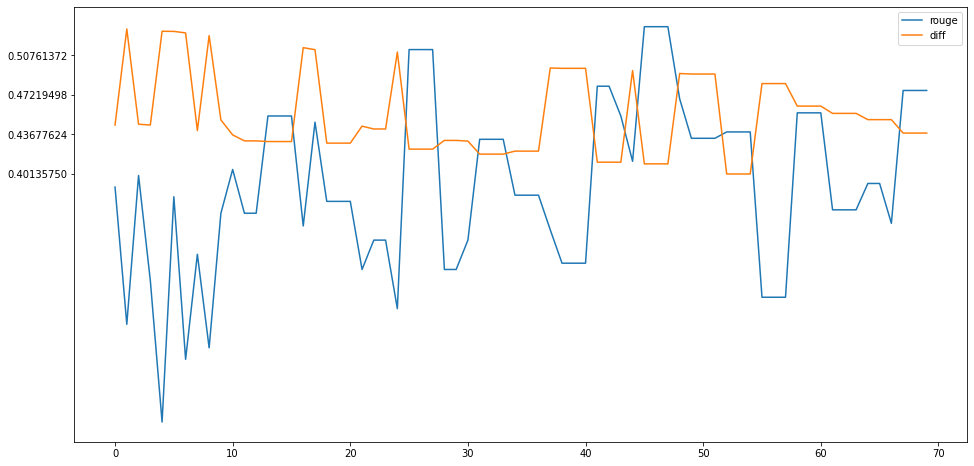

In [89]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (16,8)

# plt.plot(candidate_dataset['redundancy'], label="redundancy")
plt.plot(candidate_dataset['rouge'], label="rouge")
# plt.plot(candidate_dataset['doc_sim'], label="doc_sim")
plt.plot(candidate_dataset['doc_sim']*0.6 - candidate_dataset['redundancy']*0.4, label="diff")

val = candidate_dataset['doc_sim']*0.6 - candidate_dataset['redundancy']*0.4
val_max = max(val)
val_min = min(val)
plt.yticks(np.arange(val_min, val_max, step= val_max / 15), \
           ["%.8f" %x  for x in np.arange(val_min, val_max, step=val_max / 15)])
plt.legend()
plt.show()


In [422]:
scores = sorted(scores, key=lambda x: -x[0]*0.1 + x[1], reverse=True)
scores

[(0.26595744680851063,
  0.5333333286542222,
  "he was not booked by the referee but could face a heavy retrospective ban.\narango had earlier curled in a magnificent free kick for his team to bring them level after falling 2 - 0 down.\njuan arango bites jesus zavela in club tijuana's 4 - 3 defeat by monterrey in the mexican league."),
 (0.26595744680851063,
  0.5333333286542222,
  "he was not booked by the referee but could face a heavy retrospective ban.\narango had earlier curled in a magnificent free kick for his team to bring them level after falling 2 - 0 down.\njuan arango bites jesus zavela in club tijuana's 4 - 3 defeat by monterrey in the mexican league."),
 (0.26595744680851063,
  0.5333333286542222,
  "he was not booked by the referee but could face a heavy retrospective ban.\narango had earlier curled in a magnificent free kick for his team to bring them level after falling 2 - 0 down.\njuan arango bites jesus zavela in club tijuana's 4 - 3 defeat by monterrey in the mexic

In [424]:
abstract

['juan arango escaped punishment from the referee for biting jesus zavela .',
 'he could face a retrospective punishment for the incident .',
 "arango had earlier scored a free kick in his team 's 4-3 defeat ."]

### abstract redundancy & rouge

In [406]:
compute_txt_redundancy_score([abstract])

tensor([0.2944], dtype=torch.float64)